Dataset: Quality of life index  
https://www.numbeo.com/quality-of-life/rankings_by_country.jsp

In [37]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df_quality= pd.read_csv('../data/Quality_of_life_index_2011_2023.csv', sep = "\s*,\s*")
df_quality.columns = df_quality.columns.str.replace(' ','_')
df_quality.columns = df_quality.columns.str.lower()
df_quality.head(15)

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_11894/3621044404.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_quality= pd.read_csv('../data/Quality_of_life_index_2011_2023.csv', sep = "\s*,\s*")


,year,country,quality_of_life_index,purchasing_power_index,crime_index,safety_index,health_care_index,cost_of_living_index,property_price_to_income_ratio,traffic_commute_time_index,pollution_index,climate_index
0,2023,Luxembourg,207.3,148.9,34.4,65.6,76.3,65.3,9.1,26.1,21.8,82.6
1,2023,Netherlands,198.5,103.3,26.3,73.7,78.9,64.3,7.4,23.7,21.8,87.1
2,2023,Iceland,194.9,109.1,25.4,74.6,67.1,85.7,5.6,21.9,15.8,68.8
3,2023,Denmark,193.6,103.3,26.3,73.7,78.0,75.2,6.8,28.7,21.9,82.5
4,2023,Finland,190.4,97.3,26.3,73.7,77.3,65.5,8.3,26.0,12.0,58.9
5,2023,Oman,187.0,109.6,19.0,81.0,61.0,44.4,3.1,21.9,38.4,67.2
6,2023,Switzerland,186.7,118.9,25.3,74.7,72.6,112.2,11.1,33.1,22.2,79.2
7,2023,Norway,184.2,94.9,32.6,67.4,75.7,79.2,7.8,26.8,18.6,71.4
8,2023,Austria,181.5,84.4,29.3,70.7,76.6,66.8,11.0,24.1,21.8,77.8
9,2023,Estonia,180.1,69.0,23.8,76.2,76.3,53.0,10.2,21.8,16.7,64.3


In [39]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            945 non-null    int64  
 1   country                         945 non-null    object 
 2   quality_of_life_index           945 non-null    float64
 3   purchasing_power_index          945 non-null    float64
 4   crime_index                     945 non-null    float64
 5   safety_index                    945 non-null    float64
 6   health_care_index               945 non-null    float64
 7   cost_of_living_index            945 non-null    float64
 8   property_price_to_income_ratio  944 non-null    float64
 9   traffic_commute_time_index      945 non-null    float64
 10  pollution_index                 945 non-null    float64
 11  climate_index                   942 non-null    object 
dtypes: float64(9), int64(1), object(2)
m

In [ ]:
df_quality.query('country.str.contains("Taiwan")')


In [54]:
df_quality.replace({'Taiwan': 'Taiwan Province of China',
                  'Taiwan (China)': 'Taiwan Province of China',
                  
                  }, inplace= True)

In [80]:
df_quality.query('year==2023').to_csv('../data/quality_life_2023.txt', index=False)

In [43]:
df_happy= pd.read_csv('../data/life_ladder_gdi_eys_mys.txt', sep = ",") # contains already hdi data
df_happy.columns = df_happy.columns.str.replace(' ','_')
df_happy.columns = df_happy.columns.str.lower()
df_happy.head(15)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,gdi_year,eys_year,mys_year
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.882,0.414,0.258,0.682,8.630830,1.742754
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.850,0.481,0.237,0.685,8.888430,1.816490
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.707,0.517,0.275,0.684,9.180810,1.890226
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.731,0.480,0.267,0.671,9.473190,1.937043
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.776,0.614,0.268,0.634,9.803687,1.983860
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.823,0.547,0.273,0.667,10.134183,2.030677
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.871,0.492,0.375,0.657,10.464680,2.077493
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.881,0.491,0.339,0.682,10.482975,2.124310
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.793,0.501,0.348,0.685,10.501270,2.267770
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,0.954,0.435,0.371,0.696,10.519565,2.411230


In [57]:
quality_countries = df_quality.country.unique()
happy_countries = df_happy.country_name.unique()

In [58]:
no_intersect = np.setxor1d(quality_countries, happy_countries)
no_intersect

array(['Afghanistan', 'Algeria', 'Angola', 'Belize', 'Benin', 'Bhutan',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'China', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti',
       'El Salvador', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hong Kong (China)', 'Iraq', 'Ivory Coast', 'Jamaica',
       'Kyrgyzstan', 'Laos', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Montenegro',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger',
       'Oman', 'Paraguay', 'Puerto Rico', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'State of Palestine', 'Sudan',
       'Suriname', 'Syria', 'Tajikistan', 'Tanzania', 'Togo',
       'Trinidad and Tobago', 'Turkmenistan', 'Uganda', 'Uzbekistan',
       'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)

In [59]:
df_quality['year_country'] = df_quality['year'].astype('string') +' ' + df_quality['country']
df_quality.head(5)

,year,country,quality_of_life_index,purchasing_power_index,crime_index,safety_index,health_care_index,cost_of_living_index,property_price_to_income_ratio,traffic_commute_time_index,pollution_index,climate_index,year_country
0,2023,Luxembourg,207.3,148.9,34.4,65.6,76.3,65.3,9.1,26.1,21.8,82.6,2023 Luxembourg
1,2023,Netherlands,198.5,103.3,26.3,73.7,78.9,64.3,7.4,23.7,21.8,87.1,2023 Netherlands
2,2023,Iceland,194.9,109.1,25.4,74.6,67.1,85.7,5.6,21.9,15.8,68.8,2023 Iceland
3,2023,Denmark,193.6,103.3,26.3,73.7,78.0,75.2,6.8,28.7,21.9,82.5,2023 Denmark
4,2023,Finland,190.4,97.3,26.3,73.7,77.3,65.5,8.3,26.0,12.0,58.9,2023 Finland


In [60]:
df_happy['year_country'] = df_happy['year'].astype('string') +' ' + df_happy['country_name']
df_happy.head(5)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,gdi_year,eys_year,mys_year,year_country
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.882,0.414,0.258,0.682,8.630830,1.742754,2008 Afghanistan
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.850,0.481,0.237,0.685,8.888430,1.816490,2009 Afghanistan
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.707,0.517,0.275,0.684,9.180810,1.890226,2010 Afghanistan
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.731,0.480,0.267,0.671,9.473190,1.937043,2011 Afghanistan
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.776,0.614,0.268,0.634,9.803687,1.983860,2012 Afghanistan


In [61]:
df_combine = pd.merge(df_quality, df_happy, on=['year_country'], how='left')
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_x                            945 non-null    int64  
 1   country                           945 non-null    object 
 2   quality_of_life_index             945 non-null    float64
 3   purchasing_power_index            945 non-null    float64
 4   crime_index                       945 non-null    float64
 5   safety_index                      945 non-null    float64
 6   health_care_index                 945 non-null    float64
 7   cost_of_living_index              945 non-null    float64
 8   property_price_to_income_ratio    944 non-null    float64
 9   traffic_commute_time_index        945 non-null    float64
 10  pollution_index                   945 non-null    float64
 11  climate_index                     942 non-null    object 
 12  year_cou

df_combine.query('life_ladder.isnull()')

In [62]:
df_combine.columns

Index(['year_x', 'country', 'quality_of_life_index', 'purchasing_power_index',
       'crime_index', 'safety_index', 'health_care_index',
       'cost_of_living_index', 'property_price_to_income_ratio',
       'traffic_commute_time_index', 'pollution_index', 'climate_index',
       'year_country', 'country_name', 'year_y', 'life_ladder',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'gdi_year', 'eys_year', 'mys_year'],
      dtype='object')

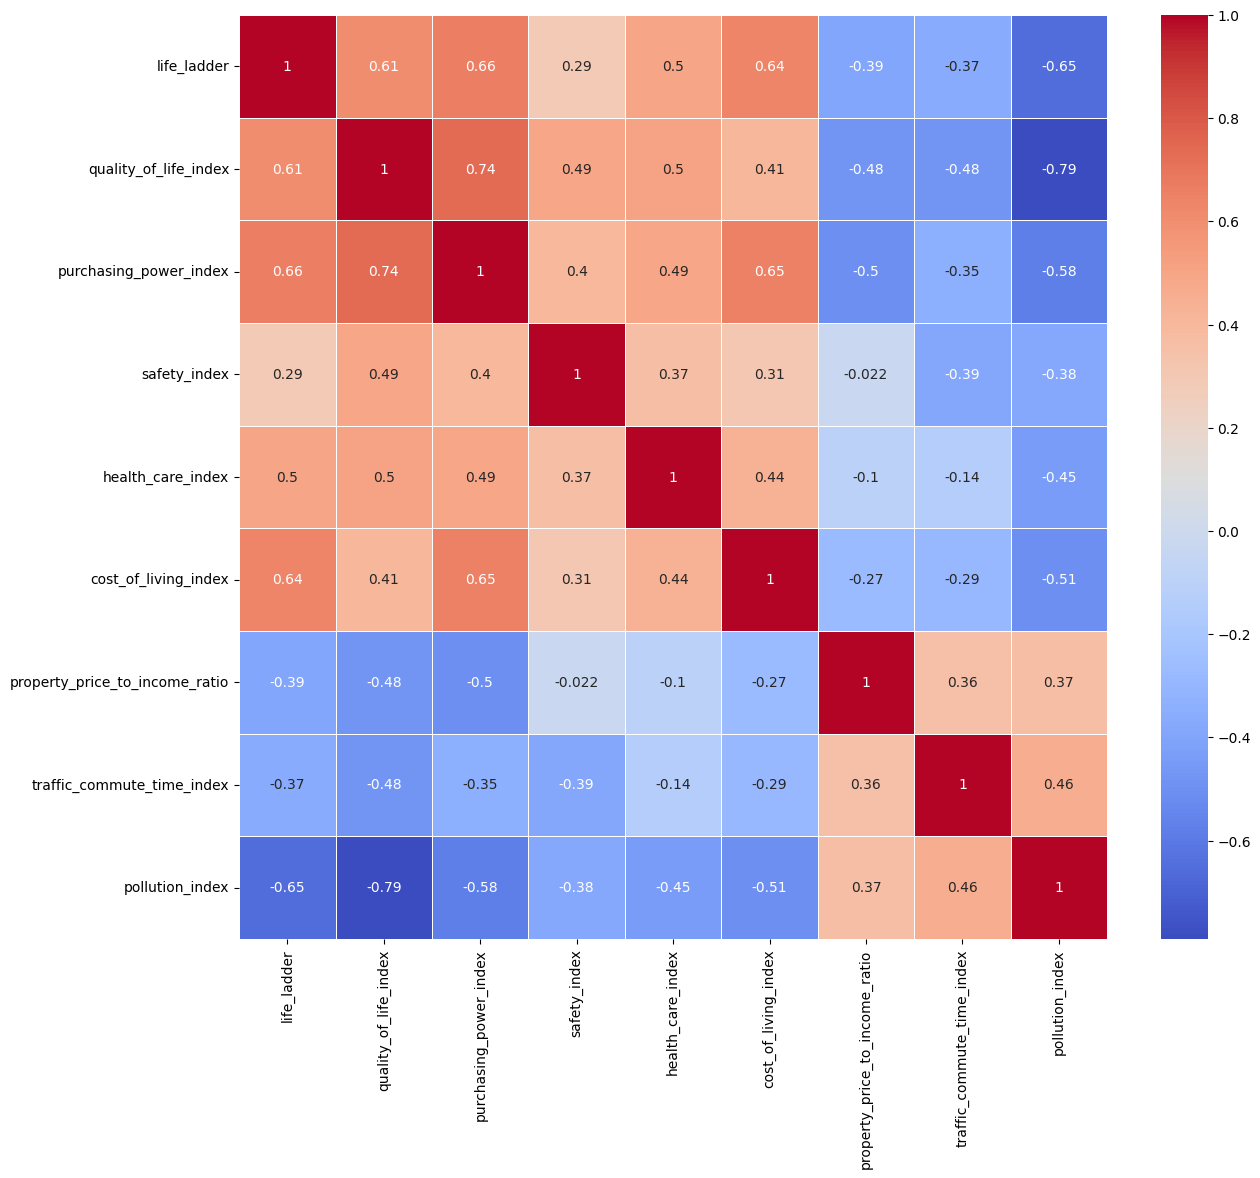

In [12]:
corr_columns=['life_ladder', 'quality_of_life_index', 'purchasing_power_index',
       'safety_index', 'health_care_index',
       'cost_of_living_index', 'property_price_to_income_ratio',
       'traffic_commute_time_index', 'pollution_index']
plt.figure(figsize = (14,12))
ax = sns.heatmap(df_combine[corr_columns].corr(),
                 linewidths=.5, annot=True, cmap='coolwarm')

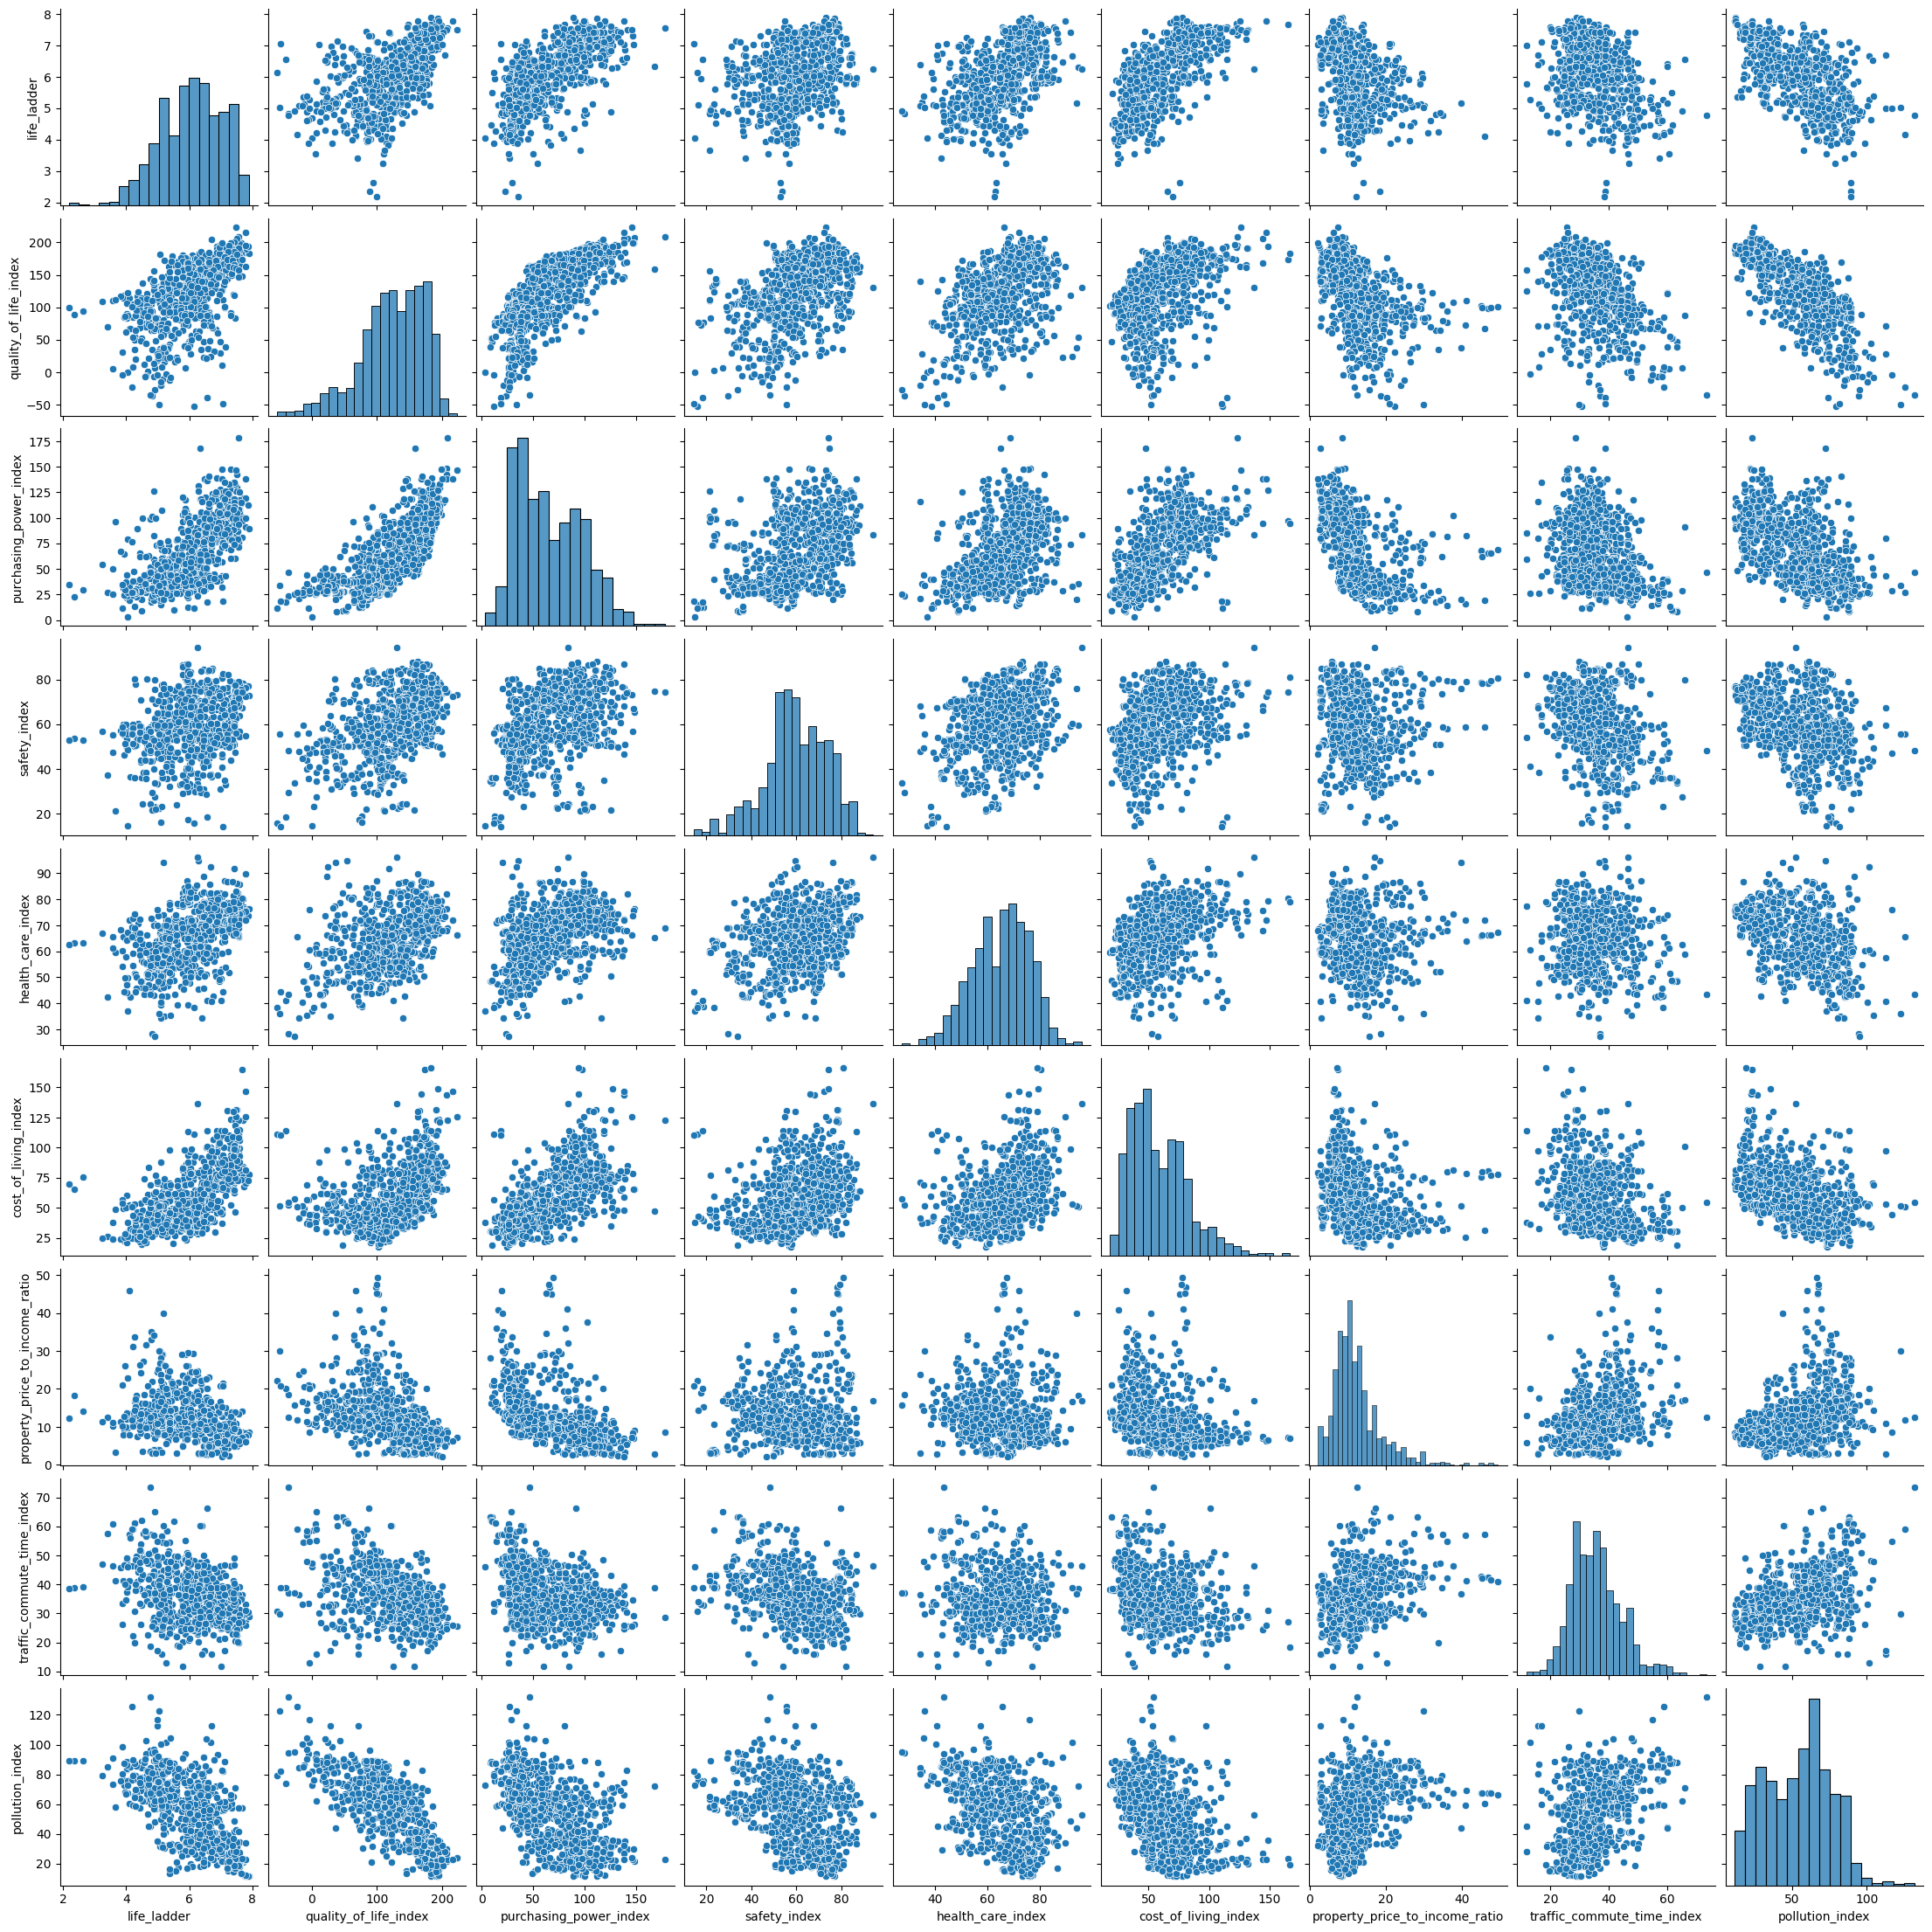

In [13]:
# Plot pair plot of potential features
sns.pairplot(df_combine[corr_columns]);

What Is Purchasing Power?
Purchasing power is the value of a currency expressed in terms of the number of goods or services that one unit of money can buy. It can weaken over time due to inflation. That's because rising prices effectively decrease the number of goods or services you can buy. Purchasing power is also known as a currency's buying power.

In investment terms, purchasing or buying power is the dollar amount of credit available to a customer based on the existing marginable securities in the customer's brokerage account.

---

Was ist Kaufkraft?
Die Kaufkraft ist der Wert einer Währung, ausgedrückt durch die Anzahl der Waren oder Dienstleistungen, die man mit einer Geldeinheit kaufen kann. Sie kann im Laufe der Zeit durch die Inflation schwächer werden. Das liegt daran, dass durch steigende Preise die Anzahl der Waren oder Dienstleistungen, die Sie kaufen können, sinkt. Die Kaufkraft wird auch als die Kaufkraft einer Währung bezeichnet.

In Bezug auf Investitionen ist die Kaufkraft der Dollarbetrag, der einem Kunden auf der Grundlage der vorhandenen einschussfähigen Wertpapiere auf seinem Maklerkonto zur Verfügung steht.

Übersetzt mit DeepL.com (kostenlose Version)

In [66]:
df_combine.columns

Index(['year_x', 'country', 'quality_of_life_index', 'purchasing_power_index',
       'crime_index', 'safety_index', 'health_care_index',
       'cost_of_living_index', 'property_price_to_income_ratio',
       'traffic_commute_time_index', 'pollution_index', 'climate_index',
       'year_country', 'country_name', 'year_y', 'life_ladder',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'gdi_year', 'eys_year', 'mys_year'],
      dtype='object')

In [67]:
df_extract = df_combine[['year_x', 'country_name', 'life_ladder',
                         'quality_of_life_index', 'purchasing_power_index',
                         'crime_index', 'health_care_index',
                         'cost_of_living_index', 'pollution_index', 
                         'log_gdp_per_capita', 'social_support',
                         'healthy_life_expectancy_at_birth','freedom_to_make_life_choices',
                         'perceptions_of_corruption', 'positive_affect', 'negative_affect',
                         'eys_year', 'mys_year']]

In [68]:
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_x                            945 non-null    int64  
 1   country_name                      728 non-null    object 
 2   life_ladder                       728 non-null    float64
 3   quality_of_life_index             945 non-null    float64
 4   purchasing_power_index            945 non-null    float64
 5   crime_index                       945 non-null    float64
 6   health_care_index                 945 non-null    float64
 7   cost_of_living_index              945 non-null    float64
 8   pollution_index                   945 non-null    float64
 9   log_gdp_per_capita                728 non-null    float64
 10  social_support                    728 non-null    float64
 11  healthy_life_expectancy_at_birth  728 non-null    float64
 12  freedom_

In [69]:
df_extract.dropna(inplace=True)
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 85 to 943
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_x                            716 non-null    int64  
 1   country_name                      716 non-null    object 
 2   life_ladder                       716 non-null    float64
 3   quality_of_life_index             716 non-null    float64
 4   purchasing_power_index            716 non-null    float64
 5   crime_index                       716 non-null    float64
 6   health_care_index                 716 non-null    float64
 7   cost_of_living_index              716 non-null    float64
 8   pollution_index                   716 non-null    float64
 9   log_gdp_per_capita                716 non-null    float64
 10  social_support                    716 non-null    float64
 11  healthy_life_expectancy_at_birth  716 non-null    float64
 12  freedom_to_m

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_11894/598996378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract.dropna(inplace=True)


df_extract.to_csv('../data/life_ladder_and_quality_life_combined.txt', index=False)

In [70]:
df_extract.to_csv('../data/life_ladder_and_quality_life_and_hdi_combined.txt', index=False)

In [71]:
country_names_lst = df_extract.country_name.unique().tolist()
len(country_names_lst)

82

ValueError: Could not interpret input 'year'

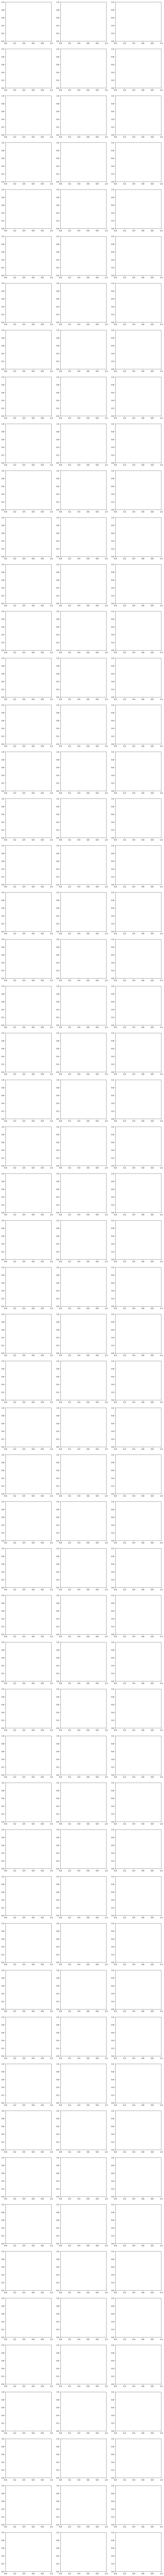

In [74]:
fig,axes = plt.subplots(55,3, figsize =(15,250))
count = 0
for item in country_names_lst:
    sns.barplot(data = df_extract[df_extract['country_name'] == item],
                 x = 'year', y = 'eys_year', 
                 ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
    count += 1